# 과제 1

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = load_breast_cancer().data
labels = load_breast_cancer().target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2019)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

#### get_clf_eval 함수 내 print() 참고해서 적절한 함수 만들기

In [4]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬\n', confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 정밀도:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [5]:
get_clf_eval(y_test, pred)

오차행렬
 [[41  2]
 [ 8 63]]
정확도:0.9123, 정밀도:0.9692, 정밀도:0.8873, F1:0.9265


#### print() 참고해서 roc_auc_score 구하기

In [6]:
from sklearn.metrics import roc_auc_score

pred = dt_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print(np.round(roc_score, 3))

0.92


# 과제 2 - ROC 그래프 그리기

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

In [8]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [10]:
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

In [11]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

### 다음 함수 채우기

In [14]:
def roc_curve_plot(y_test,pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
    
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    
    # 가운데 대각선 직선 (기준선)
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR x축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    # x축, y축 이름 설정
    plt.xlabel('FPR(1 - TNR)')
    plt.ylabel('TPR(Recall)')
    
    # label 이름 표시
    plt.legend()

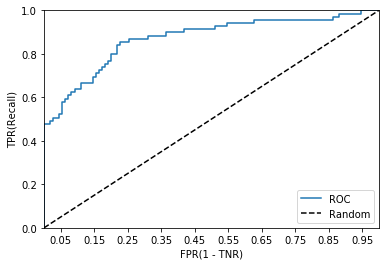

In [15]:
roc_curve_plot(y_test, pred_proba)